In [3]:
import requests, pickle
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
import tensorflow.keras.optimizers as optimizers
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from keras.src.layers import Dropout
from keras.src.regularizers import regularizers

### Carga de datos

In [4]:
'''url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
r = requests.get(url, allow_redirects=True)
open('./mnist1d_data.pkl', 'wb').write(r.content)'''

with open('./mnist1d_data.pkl', 'rb') as handle:
    data = pickle.load(handle)
    
data.keys()

dict_keys(['x', 'x_test', 'y', 'y_test', 't', 'templates'])

### Desempaquetado y normalización de los datos
MinMaxScaler de sklearn y OneHot encoder de autoría propia

In [5]:
import mios
x = data["x"]
x_test = data["x_test"]
y = data["y"]
y_test = data["y_test"]
y = mios.OneHot(y)
y_test = mios.OneHot(y_test)

scaler = MinMaxScaler()
scaler.fit(x)
scaler.transform(x)
scaler.transform(x_test)
print()

### Declaración de la red neuronal

In [4]:
snn = Sequential()
snn.add(Input(shape=(40,)))
snn.add(Dense(300, activation='relu'))
snn.add(Dense(10, activation='softmax'))

adam = optimizers.Adam(0.001)

snn.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=adam,
              metrics=['accuracy'])

snn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │        12,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,310 (59.80 KB)

 Trainable params: 15,310 (59.80 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [5]:
H = snn.fit(x, y, epochs=1000, validation_data=[x_test, y_test])

Epoch 1/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1955 - loss: 2.0935 - val_accuracy: 0.2920 - val_loss: 1.7358
Epoch 2/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3637 - loss: 1.6548 - val_accuracy: 0.3550 - val_loss: 1.6139
Epoch 3/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4393 - loss: 1.5330 - val_accuracy: 0.4070 - val_loss: 1.5181
Epoch 4/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5020 - loss: 1.4008 - val_accuracy: 0.4500 - val_loss: 1.4472
Epoch 5/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5659 - loss: 1.3069 - val_accuracy: 0.4950 - val_loss: 1.3570
Epoch 6/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6107 - loss: 1.2089 - val_accuracy: 0.5140 - val_loss: 1.3037
Epoch 7/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6300 - loss: 1.1260 - val_accuracy: 0.5300 - val_loss: 1.2549
Epoch 8/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6496 - loss: 1.0809 - 

### Graficación de comportamiento

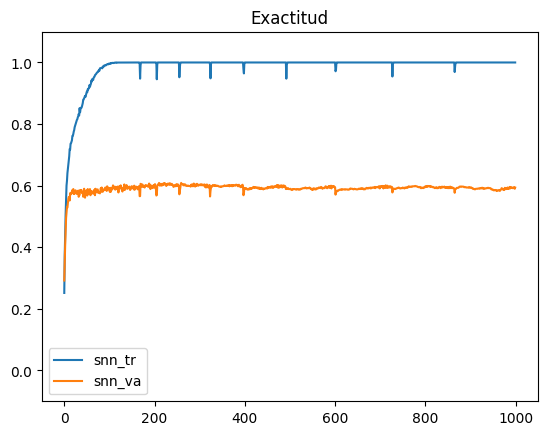

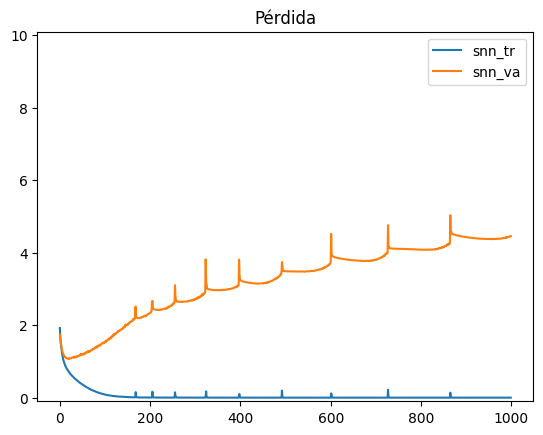

In [46]:
pyplot.title("Exactitud")
pyplot.plot(H.history['accuracy'], label='snn_tr')
pyplot.plot(H.history['val_accuracy'], label='snn_va')
pyplot.ylim(-0.1,1.1)
pyplot.legend()
pyplot.show()

pyplot.title("Pérdida")
pyplot.plot(H.history['loss'], label='snn_tr')
pyplot.plot(H.history['val_loss'], label='snn_va')
pyplot.ylim(-0.1,10.1)
pyplot.legend()
pyplot.show()

## Propuesta de mejora

### Declaración del modelo

In [6]:
snn_p = Sequential()
snn_p.add(Input(shape=(40,)))
snn_p.add(Dropout(0.2, input_shape=(40,)))
snn_p.add(Dense(300, activation='relu', activity_regularizer=regularizers.L2(0.00001)))
#, activity_regularizer=regularizers.L2(0.00001)
snn_p.add(Dense(10, activation='softmax'))

callbacks = [keras.callbacks.EarlyStopping(patience=200)]

# opti = optimizers.Adam(learning_rate=0.001)
opti = optimizers.SGD(learning_rate=0.05, momentum=0.01)

# label_smoothing=0.01
snn_p.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=opti,
              metrics=['accuracy'])

H_p = snn_p.fit(x, y, epochs=1000, validation_data=[x_test, y_test], callbacks=callbacks)
#, callbacks=callbacks

Epoch 1/1000


C:\Users\Milo\venv\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1820 - loss: 2.1516 - val_accuracy: 0.2720 - val_loss: 1.8183
Epoch 2/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 1.7897 - val_accuracy: 0.2980 - val_loss: 1.7279
Epoch 3/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3310 - loss: 1.7226 - val_accuracy: 0.3360 - val_loss: 1.6560
Epoch 4/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3627 - loss: 1.6774 - val_accuracy: 0.3630 - val_loss: 1.6233
Epoch 5/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4009 - loss: 1.6178 - val_accuracy: 0.3930 - val_loss: 1.5600
Epoch 6/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4176 - loss: 1.5764 - val_accuracy: 0.4210 - val_loss: 1.5382
Epoch 7/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4242 - loss: 1.5478 - val_accuracy: 0.4530 - val_loss: 1.4875
Epoch 8/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4488 - loss: 1.5010 - val_accuracy:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_1 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │        12,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,622 (119.62 KB)

 Trainable params: 15,310 (59.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,312 (59.82 KB)

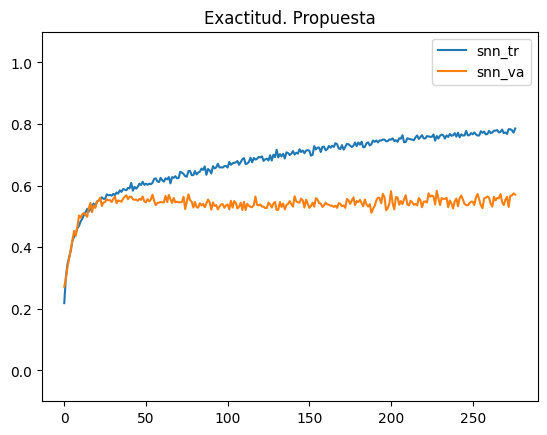

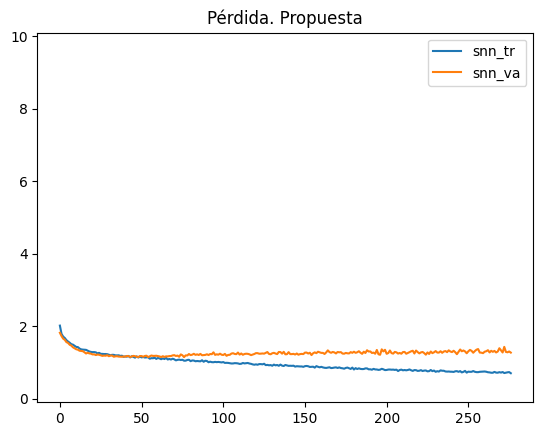

In [7]:
snn_p.summary()

pyplot.title("Exactitud. Propuesta")
pyplot.plot(H_p.history['accuracy'], label='snn_tr')
pyplot.plot(H_p.history['val_accuracy'], label='snn_va')
pyplot.ylim(-0.1,1.1)
pyplot.legend()
pyplot.show()

pyplot.title("Pérdida. Propuesta")
pyplot.plot(H_p.history['loss'], label='snn_tr')
pyplot.plot(H_p.history['val_loss'], label='snn_va')
pyplot.ylim(-0.1,10.1)
pyplot.legend()
pyplot.show()